In [49]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.svm import SVC
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math
import time
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay

In [2]:
# Функция для оценки моделей классификации
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 

In [3]:
# Input file name with path
input_file_name = 'classification_dataset.csv'
df = pd.read_csv(input_file_name)
df

,Age,Gender,Height,Weight,Platelets_mean,Platelets_std,Platelets_min,Platelets_max,Plateletsquan25,Plateletsquan75,...,WBC_min,WBC_max,WBCquan25,WBCquan75,Survival,In-hospital_death,ICUType_1,ICUType_2,ICUType_3,ICUType_4
0,54,0,169.724569,81.471419,203.000000,18.000000,185.0,221.0,194.00,212.00,...,9.4,11.2,9.850,10.750,-1,0,0,0,0,1
1,76,1,175.300000,76.000000,178.600000,29.789931,135.0,226.0,164.00,187.00,...,7.4,13.3,10.250,13.200,-1,0,0,1,0,0
2,88,0,169.724569,81.471419,103.000000,6.000000,97.0,109.0,100.00,106.00,...,3.8,4.8,4.050,4.550,918,0,0,0,1,0
3,64,1,180.300000,114.000000,210.750000,41.918820,173.0,276.0,174.50,233.25,...,12.7,24.0,13.150,16.800,1637,0,1,0,0,0
4,68,0,162.600000,87.000000,329.666667,5.249339,325.0,337.0,326.00,332.00,...,6.2,6.7,6.200,6.450,-1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,64,0,169.724569,70.000000,112.500000,9.500000,103.0,122.0,107.75,117.25,...,11.2,17.3,12.725,15.775,2210,0,0,0,0,1
7181,78,1,180.300000,83.180000,118.250000,9.496710,103.0,128.0,114.25,125.00,...,14.5,20.0,15.150,17.900,752,0,0,1,0,0
7182,90,1,177.800000,87.000000,278.428571,60.674441,191.0,351.0,227.50,337.00,...,18.0,41.8,20.450,34.200,39,0,0,0,1,0
7183,70,0,152.400000,74.000000,189.333333,27.980152,160.0,227.0,170.50,204.00,...,13.1,15.1,13.950,14.950,334,0,0,1,0,0


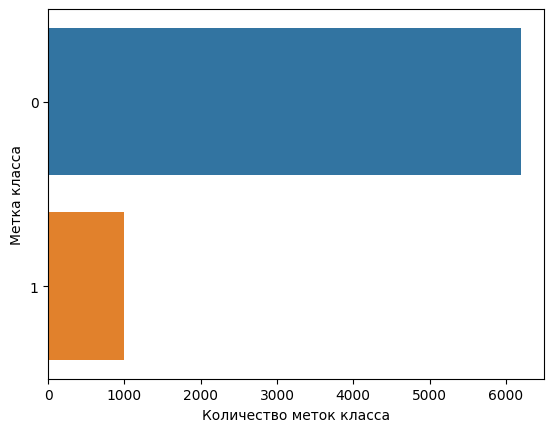

In [4]:
# Target class name
input_target_class = "In-hospital_death"
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
categorical_columns = binary_columns + categorical_columns
categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Проверка распределения целевой переменной

sns.countplot(y=df[input_target_class] ,data=df)
plt.xlabel("Количество меток класса")
plt.ylabel("Метка класса")
plt.show()

In [5]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class, 'Survival'],axis=1)
y = df[input_target_class]

# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,Age,Gender,Height,Weight,Platelets_mean,Platelets_std,Platelets_min,Platelets_max,Plateletsquan25,Plateletsquan75,...,WBC_mean,WBC_std,WBC_min,WBC_max,WBCquan25,WBCquan75,ICUType_1,ICUType_2,ICUType_3,ICUType_4
0,-0.620734,-1.127324,0.008801,0.016709,0.002205,-0.204872,0.082299,-0.090880,0.044713,-0.029109,...,-0.378056,-0.604274,-0.170144,-0.522295,-0.272050,-0.439100,-0.413932,-0.522742,-0.732061,1.563983
1,0.650606,0.887056,0.719019,-0.237305,-0.247176,0.472139,-0.446794,-0.043807,-0.268882,-0.275256,...,-0.197818,0.560798,-0.595682,-0.207212,-0.191950,-0.024562,-0.413932,1.912991,-0.732061,-0.639393
2,1.344064,-1.127324,0.008801,0.016709,-1.019845,-0.893944,-0.848905,-1.145333,-0.937885,-1.072771,...,-1.496773,-0.858190,-1.361650,-1.482548,-1.433488,-1.488135,-0.413932,-0.522742,1.366007,-0.639393
3,-0.042853,0.887056,1.355936,1.526867,0.081413,1.168613,-0.044684,0.426931,-0.159124,0.180116,...,0.703371,1.745486,0.531993,1.398212,0.388769,0.584554,2.415853,-0.522742,-0.732061,-0.639393
4,0.188300,-1.127324,-0.898751,0.273376,1.296801,-0.937049,1.563760,1.001231,1.424531,1.152395,...,-1.111437,-1.025964,-0.851004,-1.197473,-1.002955,-1.166657,-0.413932,-0.522742,1.366007,-0.639393


In [6]:
from imblearn import FunctionSampler
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline

# Over sample the minority class 
ros = RandomOverSampler(random_state=42)
ada = ADASYN(random_state=42)
smo = SMOTE(random_state=42)

In [7]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state = 0)

In [8]:
X_ada, y_ada = ada.fit_resample(X_train, y_train)
y_ada.value_counts()

1    4439
0    4335
Name: In-hospital_death, dtype: int64

In [9]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros.value_counts()

0    4335
1    4335
Name: In-hospital_death, dtype: int64

In [10]:
X_smo, y_smo = smo.fit_resample(X_train, y_train)
y_smo.value_counts()

0    4335
1    4335
Name: In-hospital_death, dtype: int64

# XGBoost

In [ ]:
%%time
# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

model = XGBClassifier()

# Run grid search 
grid = GridSearchCV(model,
                    param_grid_xgb,
                    refit = True,#Refit an estimator using the best found parameters on the whole dataset.
                    verbose = 3,
                    n_jobs = -1) 

# fit the model for grid search 
grid.fit(X_train, y_train)

# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]

compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

In [ ]:
filename = 'XGB_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

# RandomForest

In [ ]:
%%time
# Define the parameters gird for XGBoost
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'criterion' : ['gini', 'entropy'],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

model = RandomForestClassifier()
param_grid = param_grid_random_forest
 # Run grid search 
grid = GridSearchCV(model,
                    param_grid,
                    refit = True,
                    verbose = 3,
                    n_jobs = -1)

# fit the model for grid search 
grid.fit(X_ada, y_ada)

# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]

compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

In [ ]:
filename = 'RF_model_ada.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

# LogisticRegressin

In [ ]:
%%time
# Define the parameters gird for XGBoost
param_grid_logistic_regression = {'penalty'   : ['l1', 'l2', 'elasticnet', 'none'],
                                  'C' : [0.1, 0.3, 0.5, 1.0]     
                                 }  

model = LogisticRegression()
param_grid = param_grid_logistic_regression
 # Run grid search 
grid = GridSearchCV(model,
                    param_grid,
                    refit = True,
                    verbose = 3,
                    n_jobs = -1)

# fit the model for grid search 
grid.fit(X_smo, y_smo)

# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]

compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

In [ ]:
filename = 'LR_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

# SVC

In [ ]:
%%time
# Define the parameters gird for XGBoost
param_grid_SVC = {'C' : [0.1, 0.3, 0.5, 1.0],
                  'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
                 }  

model = SVC()
param_grid = param_grid_SVC
 # Run grid search 
grid = GridSearchCV(model,
                    param_grid,
                    refit = True,
                    verbose = 3,
                    n_jobs = -1)

# fit the model for grid search 
grid.fit(X_train, y_train)


In [ ]:
# Функция для оценки моделей классификации
def compute_evaluation_metric(model, x_test, y_actual, y_predicted):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
   #print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 

In [ ]:
# Prediction using best parameters
y_pred = grid.predict(X_test)
compute_evaluation_metric(grid, X_test, y_test, y_pred)

In [ ]:
filename = 'SVC_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

# 3. Визуализировать значения важности признаков для моделей, использующих деревья и логистической регрессии.

In [11]:
# Calculating features importances
feat_labels = X_train.columns[0:]

filename = 'RF_model.sav'
forest = pickle.load(open(filename, 'rb'))

#forest.fit(X_ada, y_ada)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) GCS_mean                       0.027701
 2) GCSquan75                      0.026237
 3) Urine_mean                     0.022411
 4) GCS_max                        0.017609
 5) Urine_std                      0.015154
 6) BUN_max                        0.013927
 7) Urinequan25                    0.013924
 8) BUNquan25                      0.013362
 9) GCSquan25                      0.013140
10) BUN_min                        0.012819
11) Urinequan75                    0.012650
12) BUN_mean                       0.012287
13) BUNquan75                      0.012182
14) Urine_max                      0.011775
15) HCO3_mean                      0.010833
16) HCO3quan25                     0.010644
17) Temp_mean                      0.010544
18) HCO3quan75                     0.009833
19) PaCO2_mean                     0.009479
20) Age                            0.009246
21) PaCO2quan25                    0.009088
22) HR_std                         0.009068
23) Weight                      

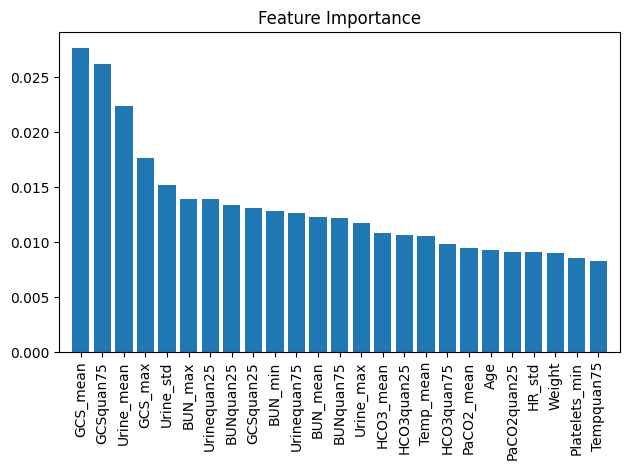

In [12]:
# Show features importances
plt.title('Feature Importance')
plt.bar(range(25), importances[indices[:25]], align='center')
plt.xticks(range(25), feat_labels[indices[:25]], rotation=90)
plt.xlim([-1, 25])
plt.tight_layout()
plt.show()

In [13]:
# Calculating features importances for Logistic Regression
filename = 'LR_model.sav'
LR = pickle.load(open(filename, 'rb'))

importances = LR.coef_[0]
indices = np.argsort(abs(importances))[::-1]


for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Urine_mean                     -1.910565
 2) GCS_mean                       -1.772382
 3) pH_mean                        1.249470
 4) HCO3quan25                     -1.177029
 5) Urine_std                      1.111346
 6) Platelets_min                  -0.993365
 7) NIMAPquan25                    0.983437
 8) BUN_max                        0.948431
 9) Na_max                         0.927858
10) PaO2_mean                      -0.858500
11) HCO3_max                       0.801141
12) Urine_max                      -0.775838
13) HCTquan75                      -0.755200
14) Na_min                         -0.750675
15) BUN_min                        0.745221
16) NISysABP_mean                  -0.733673
17) Urinequan75                    0.727373
18) Creatinine_min                 0.714693
19) pH_max                         -0.704551
20) BUNquan75                      -0.689442
21) WBCquan75                      0.681313
22) PaCO2_max                      -0.674121
23) DiasABPquan75   

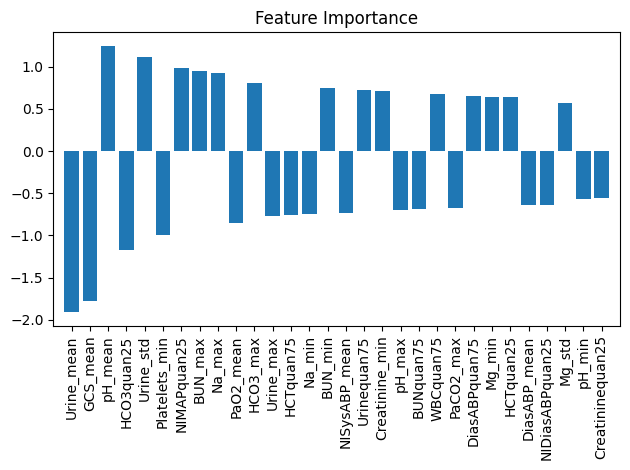

In [14]:
# Show features importances
n = 30# Number of features
plt.title('Feature Importance')
plt.bar(range(n), importances[indices[:n]], align='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.tight_layout()
plt.show()

# 4. Выполнить K-блочную стратифицированную проверку для указанных моделей с значениями гиперпараметров, полученных на предыдущем этапе, и произвести ROC-анализ.


# LR

In [15]:
filename = 'LR_model.sav'
LR = pickle.load(open(filename, 'rb'))
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
skf = StratifiedKFold(n_splits = 5)

scaled_X = X_ada# Дальнейший код был написан для Х_scaled и у, чтобы не менять везде можно поменять здесь
y = y_ada#

n_samples, n_features = scaled_X.shape

classifier = LogisticRegression(C = 1.0,
                                class_weight = None,
                                dual = False,
                                fit_intercept = True,
                                intercept_scaling = 1,
                                l1_ratio = None,
                                max_iter = 1000,
                                multi_class = 'auto',
                                n_jobs = None,
                                penalty = 'l2',
                                random_state = None,
                                solver = 'lbfgs',
                                tol = 0.0001,
                                verbose = 0,
                                warm_start = False)


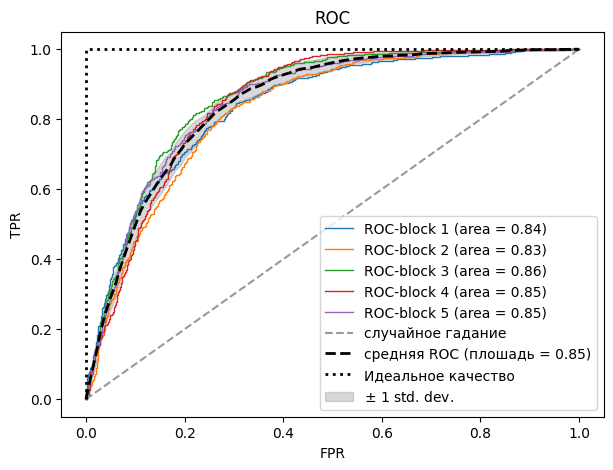

In [18]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

from sklearn import metrics

LR_importances = []
tprs = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(7,5))
roc_auc_LR = []

for i, (train, test) in enumerate(skf.split(scaled_X, y)):
   
    classifier.fit(scaled_X.values[train], y.values[train])# fit   
    prediction = classifier.predict(scaled_X.values[test])# predict
    prediction_prob = classifier.predict_proba(scaled_X.values[test])# predict
    LR_importances.append(classifier.coef_[0])
    ##Vizualization##
    fpr, tpr, thresholds = metrics.roc_curve(y[test],
                                             prediction_prob[:, 1],
                                             pos_label = 1)
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    mean_tpr += interp_tpr
    mean_tpr[0] = 0.0
    
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr,
             tpr,
             lw = 1,
             label = 'ROC-block %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1] ,
         [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = 'случайное гадание')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'средняя ROC (плошадь = %0.2f)' % mean_auc, lw = 2)

plt.plot([0, 0, 1],
        [0, 1, 1],
        lw = 2,
        linestyle = ':',
        color = 'black',
        label = 'Идеальное качество')
#######################################
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    label=r"$\pm$ 1 std. dev.",
)
#########################################
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()

In [19]:
res = LR_importances[0]
for i in range(1, len(LR_importances)):
    res += LR_importances[i]
res /= len(LR_importances)

indices = np.argsort(abs(np.array(res)))[::-1]


for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], res[indices[f]]))

 1) Urine_mean                     -2.043316
 2) GCS_mean                       -1.833315
 3) pH_mean                        1.437365
 4) BUN_max                        1.299100
 5) Urine_std                      1.159253
 6) HCO3quan25                     -1.128646
 7) Platelets_min                  -1.031507
 8) HCO3_max                       0.927727
 9) pH_max                         -0.926281
10) PaO2_mean                      -0.882714
11) NIMAPquan25                    0.877424
12) Urinequan75                    0.795229
13) Creatinine_min                 0.756938
14) Urine_max                      -0.738518
15) Na_max                         0.709875
16) PaCO2_max                      -0.697629
17) HR_mean                        0.695074
18) WBC_mean                       0.673304
19) Creatinine_max                 -0.669571
20) HCTquan75                      -0.665722
21) Mg_min                         0.656745
22) NIDiasABPquan75                -0.614453
23) GCSquan75        

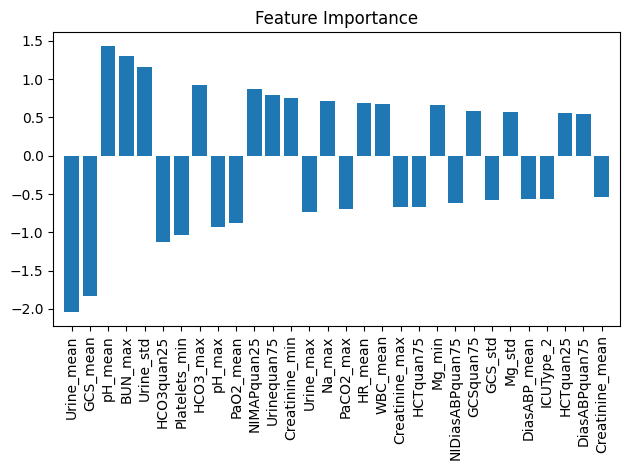

In [20]:
# Show features importances
n = 30# Number of features
plt.title('Feature Importance')
plt.bar(range(n), res[indices[:n]], align='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.tight_layout()
plt.show()

In [21]:
prediction = LR.predict(X_test)# predict

In [22]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state = 0)

# RF

In [32]:
filename = 'RF_model.sav'

RF = pickle.load(open(filename, 'rb'))
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
skf = StratifiedKFold(n_splits = 5)

scaled_X = X_ada# Дальнейший код был написан для Х_scaled и у, чтобы не менять везде можно поменять здесь
y = y_ada#

n_samples, n_features = scaled_X.shape

classifier = RandomForestClassifier(bootstrap = True,
                          ccp_alpha = 0.0,
                          class_weight = None,
                          criterion = 'gini',
                          max_depth = 20,
                          max_features = 'auto',
                          max_leaf_nodes = None,
                          max_samples = None,
                          min_impurity_decrease = 0.0,
                          min_impurity_split = None,
                          min_samples_leaf = 2,
                          min_samples_split = 2,
                          min_weight_fraction_leaf = 0.0,
                          n_estimators = 300,
                          n_jobs = None,
                          oob_score = False,
                          random_state = None,
                          verbose = 0,
                          warm_start = False)

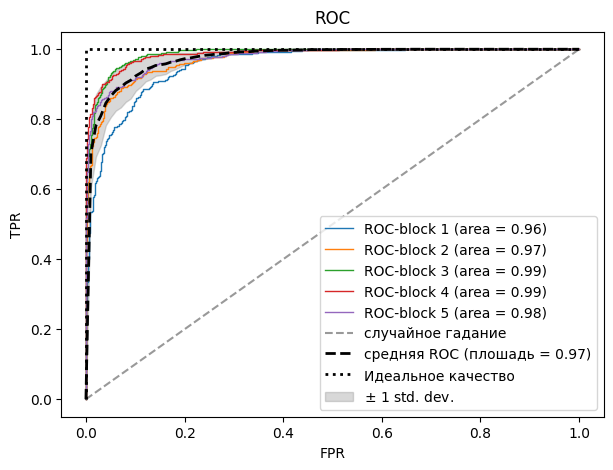

In [35]:
RF_importances = []
tprs = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(7,5))
roc_auc_LR = []

for i, (train, test) in enumerate(skf.split(scaled_X, y)):
   
    classifier.fit(scaled_X.values[train], y.values[train])# fit   
    prediction = classifier.predict(scaled_X.values[test])# predict
    prediction_prob = classifier.predict_proba(scaled_X.values[test])# predict
    
    
    RF_importances.append(classifier.feature_importances_)
    ##Vizualization##
    fpr, tpr, thresholds = metrics.roc_curve(y[test],
                                             prediction_prob[:, 1],
                                             pos_label = 1)
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    mean_tpr += interp_tpr
    mean_tpr[0] = 0.0
    
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr,
             tpr,
             lw = 1,
             label = 'ROC-block %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1] ,
         [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = 'случайное гадание')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'средняя ROC (плошадь = %0.2f)' % mean_auc, lw = 2)

plt.plot([0, 0, 1],
        [0, 1, 1],
        lw = 2,
        linestyle = ':',
        color = 'black',
        label = 'Идеальное качество')
#######################################
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    label=r"$\pm$ 1 std. dev.",
)
#########################################
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()

In [39]:
res = RF_importances[0]
for i in range(1, len(RF_importances)):
    res += RF_importances[i]
res /= len(RF_importances)

indices = np.argsort(np.array(res))[::-1]


for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], res[indices[f]]))

 1) GCS_max                        0.049573
 2) GCSquan75                      0.047714
 3) GCSquan25                      0.025138
 4) ICUType_3                      0.024512
 5) Urine_min                      0.022081
 6) BUN_max                        0.020802
 7) BUN_min                        0.020310
 8) Urine_std                      0.019871
 9) Age                            0.018718
10) Urinequan75                    0.018055
11) BUNquan25                      0.015434
12) ICUType_2                      0.015143
13) Urinequan25                    0.013307
14) pH_mean                        0.012962
15) BUN_mean                       0.012636
16) HCO3_max                       0.012311
17) GCS_min                        0.012169
18) GCS_std                        0.011760
19) Na_max                         0.011114
20) Mg_std                         0.011096
21) HR_max                         0.010936
22) Creatinine_min                 0.010557
23) Mg_min                      

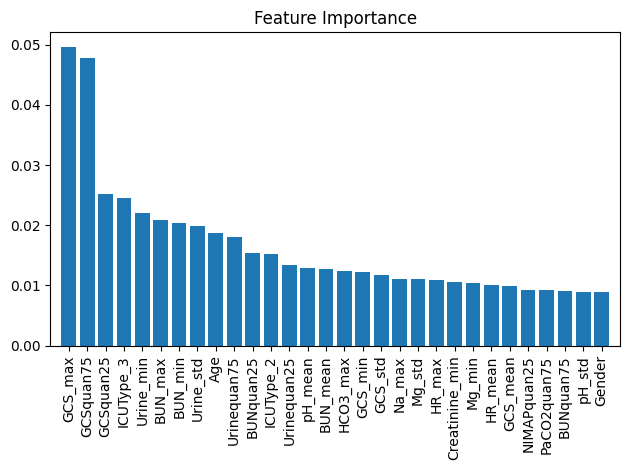

In [41]:
# Show features importances
n = 30# Number of features
plt.title('Feature Importance')
plt.bar(range(n), res[indices[:n]], align='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.tight_layout()
plt.show()

# XGB

In [42]:
filename = 'XGB_model.sav'

XGB = pickle.load(open(filename, 'rb'))
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 10,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [44]:
skf = StratifiedKFold(n_splits = 5)

scaled_X = X_ada# Дальнейший код был написан для Х_scaled и у, чтобы не менять везде можно поменять здесь
y = y_ada#

n_samples, n_features = scaled_X.shape

classifier = XGBClassifier(objective = 'binary:logistic',
                                    use_label_encoder = True,
                                    base_score = 0.5,
                                    booster = 'gbtree',
                                    colsample_bylevel = 1,
                                    colsample_bynode = 1,
                                    colsample_bytree = 1,
                                    gamma = 0,
                                    gpu_id = -1,
                                    importance_type = 'gain',
                                    interaction_constraints = '',
                                    learning_rate = 0.1,
                                    max_delta_step = 0,
                                    max_depth = 5,
                                    min_child_weight = 10,
                                    monotone_constraints = '()',
                                    n_estimators = 100,
                                    n_jobs = 4,
                                    num_parallel_tree = 1,
                                    random_state = 0,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    scale_pos_weight = 1,
                                    subsample = 1,
                                    tree_method = 'exact',
                                    validate_parameters = 1,
                                    verbosity = None)

C:\Users\UserName\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UserName\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UserName\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UserName\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\UserName\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


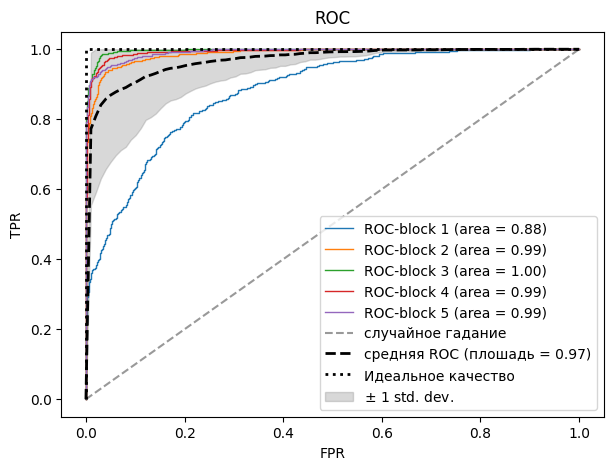

In [45]:
tprs = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(7,5))
roc_auc_LR = []

for i, (train, test) in enumerate(skf.split(scaled_X, y)):
   
    classifier.fit(scaled_X.values[train], y.values[train])# fit   
    prediction = classifier.predict(scaled_X.values[test])# predict
    prediction_prob = classifier.predict_proba(scaled_X.values[test])# predict
    ##Vizualization##
    fpr, tpr, thresholds = metrics.roc_curve(y[test],
                                             prediction_prob[:, 1],
                                             pos_label = 1)
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    mean_tpr += interp_tpr
    mean_tpr[0] = 0.0
    
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr,
             tpr,
             lw = 1,
             label = 'ROC-block %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1] ,
         [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = 'случайное гадание')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'средняя ROC (плошадь = %0.2f)' % mean_auc, lw = 2)

plt.plot([0, 0, 1],
        [0, 1, 1],
        lw = 2,
        linestyle = ':',
        color = 'black',
        label = 'Идеальное качество')
#######################################
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    label=r"$\pm$ 1 std. dev.",
)
#########################################
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()

# SVC

In [47]:
filename = 'SVC_model.sav'

SVC = pickle.load(open(filename, 'rb'))
SVC.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
skf = StratifiedKFold(n_splits = 5)

scaled_X = X_ada# Дальнейший код был написан для Х_scaled и у, чтобы не менять везде можно поменять здесь
y = y_ada#

n_samples, n_features = scaled_X.shape

classifier = SVC(C = 0.5,
                 break_ties = False,
                 cache_size = 200,
                 class_weight = None,
                 coef0 = 0.0,
                 decision_function_shape = 'ovr',
                 degree = 3,
                 gamma = 'scale',
                 kernel = 'linear',
                 max_iter = -1,
                 probability = True,
                 random_state = None,
                 shrinking = True,
                 tol = 0.001,
                 verbose = False)

<Figure size 700x500 with 0 Axes>

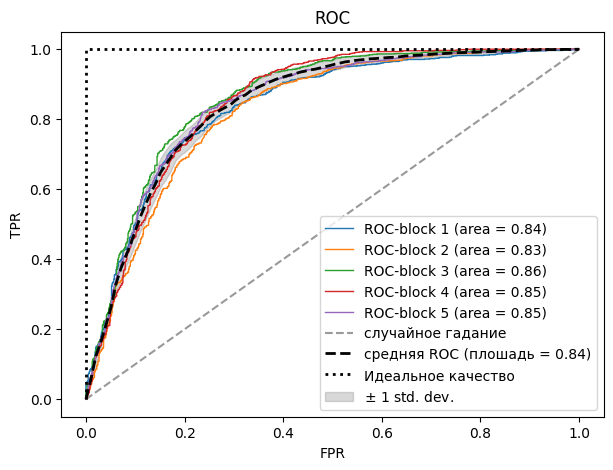

In [56]:
tprs = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(7,5))
roc_auc_LR = []

for i, (train, test) in enumerate(skf.split(scaled_X, y)):
   
    classifier.fit(scaled_X.values[train], y.values[train])# fit   
    prediction = classifier.predict(scaled_X.values[test])# predict
    prediction_prob = classifier.predict_proba(scaled_X.values[test])# predict
    ##Vizualization##
    fpr, tpr, thresholds = metrics.roc_curve(y[test],
                                             prediction_prob[:, 1],
                                             pos_label = 1)
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    mean_tpr += interp_tpr
    mean_tpr[0] = 0.0
    
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr,
             tpr,
             lw = 1,
             label = 'ROC-block %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1] ,
         [0, 1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = 'случайное гадание')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'средняя ROC (плошадь = %0.2f)' % mean_auc, lw = 2)

plt.plot([0, 0, 1],
        [0, 1, 1],
        lw = 2,
        linestyle = ':',
        color = 'black',
        label = 'Идеальное качество')
#######################################
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    label=r"$\pm$ 1 std. dev.",
)
#########################################
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()